In [2]:
import pandas as pd
from IPython.display import display 
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

data = pd.read_csv('../data/vehicle_price_prediction.csv',sep=',')

In [3]:
print("Removendo as colunas:")
df = data.copy()
df.columns = df.columns.str.strip()
df = df.drop(["seller_type", "brand_popularity"], axis=1)
df.dtypes

Removendo as colunas:


make                 object
model                object
year                  int64
mileage               int64
engine_hp             int64
transmission         object
fuel_type            object
drivetrain           object
body_type            object
exterior_color       object
interior_color       object
owner_count           int64
accident_history     object
condition            object
trim                 object
vehicle_age           int64
mileage_per_year    float64
price               float64
dtype: object

In [47]:
print("Quantidade de linhas e colunas")
print("linhas:", df.shape[0])
print("colunas:", df.shape[1])

Quantidade de linhas e colunas
linhas: 500000
colunas: 18


In [ ]:
print("Quantidade de dados faltantes para cada coluna")
df['accident_history'].fillna("Não teve acidente", inplace=True)
df.isnull().sum()

In [76]:
print("Describe dos dados numéricos:")
df.describe()

Describe dos dados numéricos:


,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,price
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,2017.45,112646.71,235.69,3.48,7.59,14539.98,20337.70
std,3.90,72095.15,93.66,1.54,3.83,6106.91,13650.44
min,2000.00,500.00,90.00,1.00,1.00,34.19,1500.00
25%,2015.00,57663.75,162.00,2.00,5.00,10490.75,10326.15
50%,2018.00,103338.00,215.00,4.00,7.00,14684.50,17874.32
75%,2020.00,157902.25,300.00,5.00,10.00,18690.22,27627.98
max,2025.00,300000.00,576.00,5.00,25.00,51046.00,91259.31


In [ ]:
print("Verificar dados duplicados")
df.loc[df.duplicated()]

In [ ]:
print("Valores unicos")
df.nunique()

In [ ]:
df.loc[:, ['make','model', 'year', 'mileage', 'price']].sort_values(by='price', ascending = False).head(10)

Quantidade de carros no ano de fabricação


Text(0, 0.5, 'Carros fabricados')

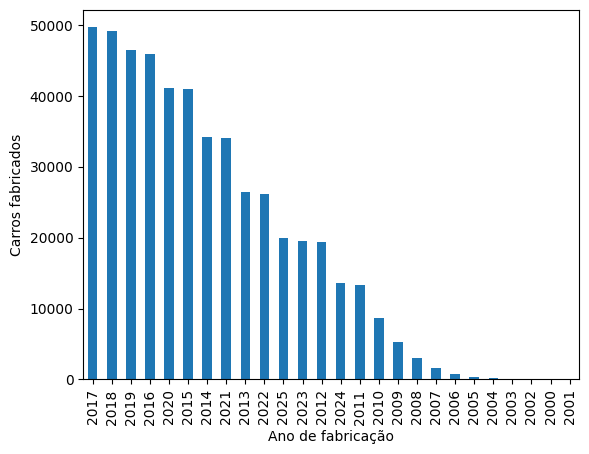

In [73]:
print("Quantidade de carros no ano de fabricação")
ax = df['year'].value_counts().plot(kind='bar')

ax.set_xlabel('Ano de fabricação')
ax.set_ylabel('Carros fabricados')

Quantidade de carros no ano de fabricação


Text(0.5, 1.0, '')

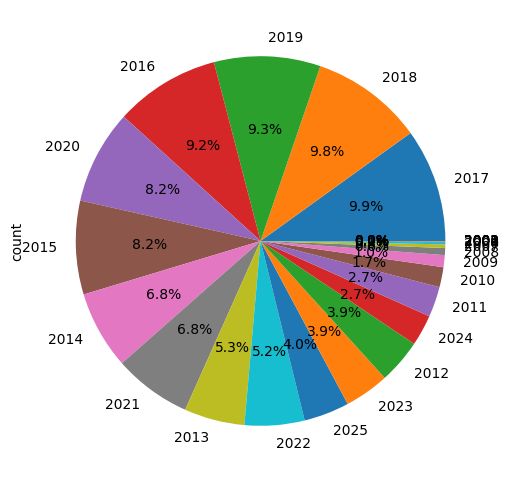

In [ ]:
print("Quantidade de carros no ano de fabricação grafico em pizza")
plt.figure(figsize=(10,6))
df['year'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('')

In [42]:
display(df.head(5))

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,condition,trim,vehicle_age,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,Não teve acidente,Excellent,EX,9,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Good,LX,15,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,Não teve acidente,Excellent,Touring,9,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,Não teve acidente,Good,Base,9,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Excellent,Sport,7,8151.30
